*Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?*

*Какие факторы влияют на зарплату у специалистов Data Scientist?*

*Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?*

*Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?*

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels import stats as sms
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import re 
import category_encoders as ce
import dtale
import statsmodels.stats as st
import scipy.stats as stats


Распакуем дату и заменим все значения salary на salary_in_usd для простоты работы с данными. Также удалим дупликаты и столбцы, которые не нужны для исследования.

In [3]:
original_data = pd.read_csv('C:/Users/atade/OneDrive/Рабочий стол/Learning/EDA/ds_salaries.csv')
data = original_data.copy()
data.drop(columns=['Unnamed: 0'], inplace=True)



data['salary'] = data['salary_in_usd']

data.drop(columns=['salary_in_usd', 'salary_currency'], inplace=True)

data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB


*Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?*

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

C:\Users\atade\AppData\Local\Temp\ipykernel_2192\2564548257.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\atade\AppData\Local\Temp\ipykernel_2192\2564548257.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\atade\AppData\Local\Temp\ipykernel_2192\2564548257.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



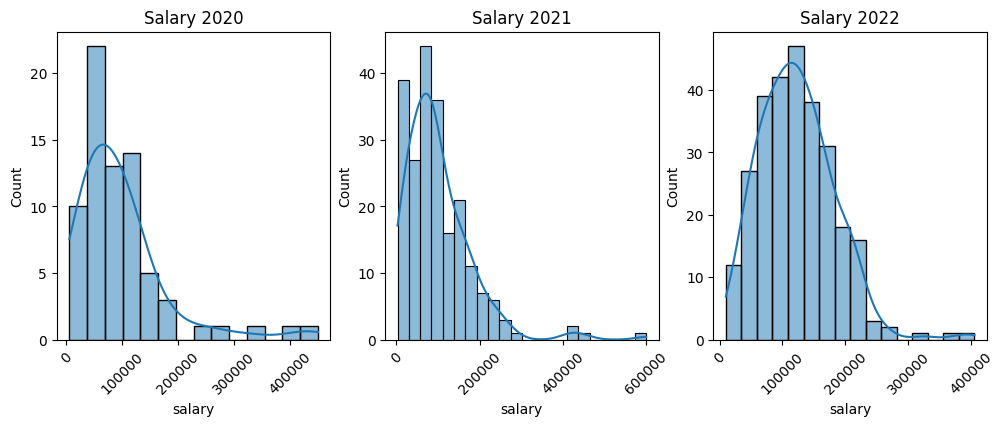

In [4]:
display(data['work_year'].value_counts()) # Just 3 categ.

fig, axes = plt.subplots(nrows=1,ncols=3,figsize= (12,4))

sns.histplot(data=data[data['work_year'] == 2020]['salary'], ax=axes[0], kde=True)
axes[0].set_title('Salary 2020')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
sns.histplot(data=data[data['work_year'] == 2021]['salary'], ax=axes[1], kde=True)
axes[1].set_title('Salary 2021')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
sns.histplot(data=data[data['work_year'] == 2022]['salary'], ax=axes[2], kde=True)
axes[2].set_title('Salary 2022')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
plt.show()

plt.show()

Слишком большое количество выбросов в каждой из выборок. Применим методы трех сигм и IQR для того, чтобы избавиться от них

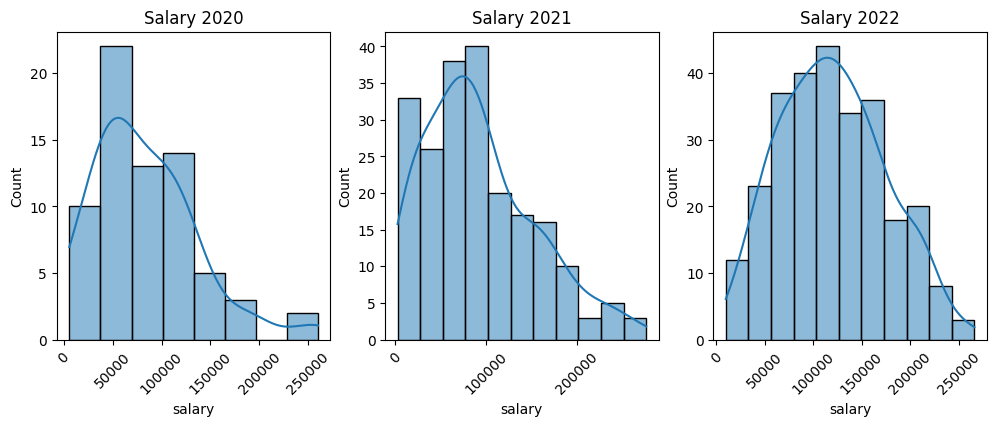

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           555 non-null    int64 
 1   experience_level    555 non-null    object
 2   employment_type     555 non-null    object
 3   job_title           555 non-null    object
 4   salary              555 non-null    int64 
 5   employee_residence  555 non-null    object
 6   remote_ratio        555 non-null    int64 
 7   company_location    555 non-null    object
 8   company_size        555 non-null    object
dtypes: int64(3), object(6)
memory usage: 43.4+ KB


In [5]:
import warnings
warnings.filterwarnings("ignore")


#data = original_data.copy()
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return cleaned

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return cleaned


data = outliers_z_score(data,'salary')

data = outliers_iqr_mod(data, 'salary')

fig, axes = plt.subplots(nrows=1,ncols=3,figsize= (12,4))

sns.histplot(data=data[data['work_year'] == 2020]['salary'], ax=axes[0], kde=True)
axes[0].set_title('Salary 2020')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
sns.histplot(data=data[data['work_year'] == 2021]['salary'], ax=axes[1], kde=True)
axes[1].set_title('Salary 2021')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
sns.histplot(data=data[data['work_year'] == 2022]['salary'], ax=axes[2], kde=True)
axes[2].set_title('Salary 2022')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
plt.show()

data.info()

После того, как мы избавились от выбросов, можно приступать к анализу данных и ответу на вопрос: *наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?*

***Сформулируем гипотезы:***

**Нулевая гипотеза**: Года не различаются по размерам зарплат. Объем выплат одинаков.

**Альтернативная гипотеза**: Есть ежегодный прирост зарплат у дата-сайентистов. Объем выплат увеличивается.

Поскольку данные не распределенны нормально необходимо использовать непараметрический тест для трех независимых групп. Нам подойдет тест Краскела-Уолиса.


In [6]:
_, p = stats.kruskal(data[data['work_year'] == 2020]['salary'], data[data['work_year'] == 2021]['salary'], data[data['work_year'] == 2022]['salary'])

print('p-value = {:.3f}'.format(p))
print(p)

px.histogram(
    data_frame=data,
    x='salary',
    color='work_year'
).show()

px.box(
    data_frame=data,
    x='salary',
    #y='work_year',
    color='work_year'
).show()




p-value = 0.000
1.0323688253287345e-10


Значение-p ниже заданного уровня значимости в 0.05, из этого следует, что у нас нет оснований для того, чтобы не отвергать нулевую гипотезу. Также, построенные гистограмма и корбчатая диаграма не противоречат данному утверждению.

**Какие факторы влияют на зарплату у специалистов Data Scientist?**

Первый и очевидний фактор, который потенциально может влиять на объем зарплаты у специалистов это тип трудойстройства.
***Сформулируем гипотезы:***

**Нулевая гипотеза**: Зарпалты не различаются по типу трудоустройства. Объем выплат одинаков.

**Альтернативная гипотеза**: Есть различия в оплате труда в зависимости от типа трудойстроства. Объем выплат различен.


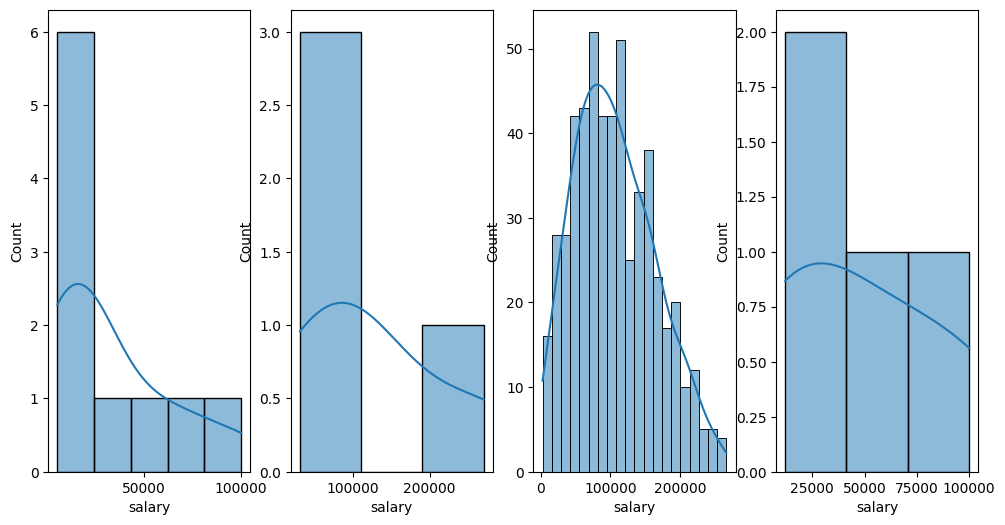

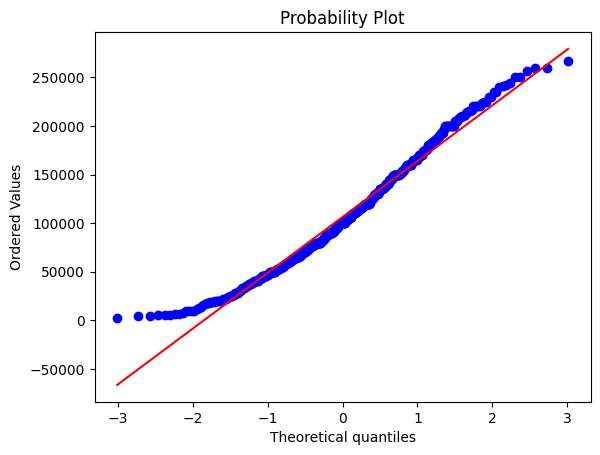

In [7]:
#data = original_data.copy()
data = outliers_z_score(data,'salary')

data = outliers_iqr_mod(data, 'salary')
#data.drop(data[(data['employment_type'] == 'PT') & (data['salary'] > 175000)].index, inplace=True)

px.box(
    data_frame=data,
    x='salary',
    color='employment_type',
    title='Распределение зарплат в разрезе типа трудойстроства'
).show()

px.histogram(
    data_frame=data,
    x='salary',
    color='employment_type',
    nbins=100
).show()

fig, axes = plt.subplots(1,4,figsize=(12,6))
sns.histplot(data[data['employment_type'] == 'PT']['salary'], kde=True, ax=axes[0])
sns.histplot(data[data['employment_type'] == 'CT']['salary'], kde=True, ax=axes[1])
sns.histplot(data[data['employment_type'] == 'FT']['salary'], bins=20, kde=True, ax=axes[2])
sns.histplot(data[data['employment_type'] == 'FL']['salary'], kde=True, ax=axes[3])
plt.show()
stats.probplot(data[data['employment_type'] == 'FT']['salary'], plot=plt)
plt.show()


In [8]:
_, p = stats.kruskal(data[data['employment_type'] == 'PT']['salary'], data[data['employment_type'] == 'FT']['salary'],data[data['employment_type'] == 'CT']['salary'],data[data['employment_type'] == 'FL']['salary'])

print('p-value = {:.3f}'.format(p))
print(p)


p-value = 0.000
0.00012717429993281396


Значение-p ниже заданного уровня значимости в 0.05, из этого следует, что у нас нет оснований для того, чтобы не отвергать нулевую гипотезу. Также, построенные гистограмма и корбчатая диаграма не противоречат данному утверждению.

**Какие факторы влияют на зарплату у специалистов Data Scientist?**

Самый очевидний фактор, который потенциально может влиять на объем зарплаты у специалистов это опыт работы.
***Сформулируем гипотезы:***

**Нулевая гипотеза**: Зарпалты не различаются по уровню опыта работы. Объем выплат одинаков.

**Альтернативная гипотеза**: Есть различия в оплате труда в зависимости от опыта работы. Объем выплат увеличивается с опытом.


In [9]:
data['experience_level'].value_counts()

px.box(
    data_frame=data,
    x='salary',
    color='experience_level',
    title='Распределение зарплат в разрезе Опыта работы'
).show()

px.histogram(
    data_frame=data,
    x='salary',
    color='experience_level',
    nbins=100
).show()

In [10]:
_, p = stats.kruskal(data[data['experience_level'] == 'EX']['salary'], data[data['experience_level'] == 'EN']['salary'],data[data['experience_level'] == 'SE']['salary'],data[data['experience_level'] == 'MI']['salary'])

print(p)
print('p-value = {:.3f}'.format(p))


2.320087778032545e-36
p-value = 0.000


Значение-p ниже заданного уровня значимости в 0.05, из этого следует, что у нас есть основания для того, чтобы отвергнуть нулевую гипотезу. Также, построенные гистограмма и корбчатая диаграма не противоречат данному утверждению.

**Какие факторы влияют на зарплату у специалистов Data Scientist?**

Еще один фактор, который потенциально может влиять на объем зарплаты у специалистов это размер компании.

***Сформулируем гипотезы:***

**Нулевая гипотеза**: Зарпалты не различаются по размерам компании. Объем выплат одинаков.

**Альтернативная гипотеза**: Есть различия в оплате труда в зависимости от размера компании. Объем выплат различен.


In [11]:
data['company_size'].value_counts()

px.box(
    data_frame=data,
    x='salary',
    color='company_size',
    title='Распределение зарплат в разрезе pазмера компании'
).show()

px.histogram(
    data_frame=data,
    x='salary',
    color='company_size',
    nbins=100,
    title='Распределение зарплат в разрезе pазмера компании'
).show()


In [12]:
_, p = stats.kruskal(data[data['company_size'] == 'L']['salary'], data[data['company_size'] == 'M']['salary'],data[data['company_size'] == 'S']['salary'])


print(p)
print('p-value = {:.3f}'.format(p))


7.242990722253722e-08
p-value = 0.000


Значение-p ниже заданного уровня значимости в 0.05, из этого следует, что у нас нет оснований для того, чтобы не отвергать нулевую гипотезу. Также, построенные гистограмма и корбчатая диаграма не противоречат данному утверждению.

**Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?**

Единственная информация, непосредственно касающаяся компаний - это местоположение оной и ее размер. Попробуем найти различия в зарплатах DS и DE в различных типах компании, где:

*S — менее 50 сотрудников (небольшая компания)*

*M — от 50 до 250 сотрудников (средняя компания)*

*L — более 250 сотрудников (крупная компания)*


***Сформулируем гипотезы:***

**Нулевая гипотеза**: Зарпалты не различаются в зависимости от должности. Объем выплат одинаков или разница статистически не значима.

**Альтернативная гипотеза**: Есть различия в оплате труда в зависимости от занимаемой должности. Объем выплат различен и разница статистически значима.


Количество позиций на каждую должность в выборке job_title
Data Scientist    129
Data Engineer     120
Name: count, dtype: int64


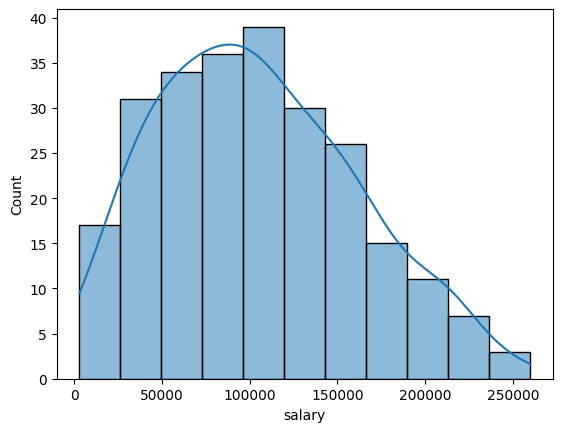

In [13]:
data['job_title'].value_counts()

data_ds = data[data['job_title'] == 'Data Scientist'][['salary', 'job_title']]
data_ds2 = data[data['job_title'] == 'Data Engineer'][['salary', 'job_title']]

data_ds = pd.concat([data_ds,data_ds2], axis=0)

data_ds = outliers_iqr_mod(data=data_ds, feature='salary')
data_ds = outliers_z_score(data=data_ds, feature='salary')

sns.histplot(
    data=data[(data['job_title'] == 'Data Scientist')|(data['job_title'] == 'Data Engineer')]['salary'],
    kde=True
)
print('Количество позиций на каждую должность в выборке',data_ds['job_title'].value_counts())

Создадим новые признаки для каждого интересующего нас значения.

In [14]:
'''_, p = stats.mannwhitneyu(x=data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'L')]['salary'], y=data[(data['job_title'] == 'Data Engineer') & (data['company_size'] == 'L')]['salary'], alternative='two-sided')
print('p-value = {:.3f}'.format(p))
_, p = stats.mannwhitneyu(x=data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'L')]['salary'], y=data[(data['job_title'] == 'Data Engineer') & (data['company_size'] == 'L')]['salary'], alternative='greater')
print('p-value = {:.3f}'.format(p))
_, p = stats.mannwhitneyu(x=data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'L')]['salary'], y=data[(data['job_title'] == 'Data Engineer') & (data['company_size'] == 'L')]['salary'], alternative='less')
print('p-value = {:.3f}'.format(p))'''


for i in  ['L', 'M', 'S']:
    _, p = stats.mannwhitneyu(x=data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == i)]['salary'], y=data[(data['job_title'] == 'Data Engineer') & (data['company_size'] == i)]['salary'], alternative='two-sided')
    print(f'p-value для разницы зарплат DS,DE в компании размера {i}')
    print('p-value = {:.3f}'.format(p))


data['DS'] = data['job_title'] == 'Data Scientist'
data['DE'] = data['job_title'] == 'Data Engineer'

data[['DS',"DE"]]

p-value для разницы зарплат DS,DE в компании размера L
p-value = 0.967
p-value для разницы зарплат DS,DE в компании размера M
p-value = 0.567
p-value для разницы зарплат DS,DE в компании размера S
p-value = 0.431


,DS,DE
0,True,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
602,False,True
603,False,True
604,False,False
605,False,False


Значение-p выше заданного уровня значимости в 0.05 для любой из компаний, из этого следует, что у нас нет оснований для того, чтобы отвергать нулевую гипотезу.


**Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**

*S — менее 50 сотрудников (небольшая компания)*

*M — от 50 до 250 сотрудников (средняя компания)*

*L — более 250 сотрудников (крупная компания)*


***Сформулируем гипотезы:***

**Нулевая гипотеза**: Количество должностей одинаково для компаний из выборки.

**Альтернативная гипотеза**: Есть различия в количетсве должностей.

In [17]:
grouped = pd.pivot_table(data=data[(data['job_title'] == 'Data Scientist')| (data['job_title'] == 'Data Engineer')], index='job_title', columns='company_size', aggfunc='count', values='salary')
display(grouped)
for i in  ['L', 'M', 'S']:
    _, p = stats.mannwhitneyu(x=data[(data['company_size'] == i)]['DS'], y=data[(data['company_size'] == i)]['DE'], alternative='two-sided')
    print(f'p-value для разницы в наличии должностей DS,DE в компании размера {i}')
    print('p-value = {:.3f}'.format(p))



company_size,L,M,S
job_title,,,
Data Engineer,34,80,6
Data Scientist,42,66,21


p-value для разницы в наличии должностей DS,DE в компании размера L
p-value = 0.304
p-value для разницы в наличии должностей DS,DE в компании размера M
p-value = 0.180
p-value для разницы в наличии должностей DS,DE в компании размера S
p-value = 0.002


work_year  experience_level  employment_type  job_title  salary  employee_residence  remote_ratio  company_location  company_size  DS    DE  
True       True              True             True       True    True                True          True              True          True  True    554
Name: count, dtype: int64

Значение-p ниже заданного уровня значимости в 0.05 для двух компаний из выборки, однако p-value меньше 0.05 для маленьких компаний 


(*S — менее 50 сотрудников (небольшая компания)*),

 что подтверждается и разницей в значениях в сводной таблице. Поэтому мы не овтергаем нулевые гипотезы для компаний размера L и M и отвергаем ее для компаний размера S.

Чтобы понять, где лучше всего работать с нынешним уровнем опыта размер зарплат в разрезе страны и опыта. 

**(Нет решения - по какой-то причине не работает)**

In [16]:
list_country = list(data['employee_residence'].value_counts().nlargest(5).index)

def country_size(val):
    if val not in list_country:
        return 'other'
    return val
data['employee_residence'] = data['employee_residence'].apply(country_size)
data['employee_residence'].value_counts()

px.box(
    data_frame=data,
    x='salary',
    color='experience_level',
    y='employee_residence',
    height=1000
).show()

for i in data['experience_level'].value_counts().index:
    _, p = stats.kruskal(data[(data['company_location'] == 'CA')&(data['experience_level'] == i)]['salary']\
                         ,data[(data['company_location'] == 'IN')&(data['experience_level'] == i)]['salary']\
                         #,data[(data['company_location'] == 'GB')&(data['experience_level'] == i)]['salary']\
                         ,data[(data['company_location'] == 'US')&(data['experience_level'] == i)]['salary']\
                         ,data[(data['company_location'] == 'other')&(data['experience_level'] == i)]['salary'])
    print(f'p-value для разницы в зарплате по странам для работника с уровнем опыта работы {i}')
    print('p-value = {:.3f}'.format(p))


p-value для разницы в зарплате по странам для работника с уровнем опыта работы SE
p-value = nan
p-value для разницы в зарплате по странам для работника с уровнем опыта работы MI
p-value = nan
p-value для разницы в зарплате по странам для работника с уровнем опыта работы EN
p-value = nan
p-value для разницы в зарплате по странам для работника с уровнем опыта работы EX
p-value = nan
